 ## Lead Generation

## Objective :  

   * Determine which countries have highest conversion rates.

   * The sales funnel has different stages:
       * Awareness ->  Leads  -> Prospects  -> Sales
       
   * Conversion is defines as a person who became a Lead.

In [4]:
from __future__ import print_function
print('Print function is ready to serve')


#get numpy, pandas and matplot
import numpy as np
print(np.__version__)

import pandas as pd
print(pd.__version__)

import matplotlib.pyplot as plt

#make plots inline

%matplotlib inline

# plot for easier visualization
import seaborn as sns

Print function is ready to serve
1.12.1
0.20.3


## Read Dataset

In [5]:
## Read the data set
df = pd.read_csv('./lead_gen.csv')

In [6]:
## let's look at the data set
df.shape

(287742, 6)

In [7]:
df.dtypes

source          object
returning        int64
mobile           int64
country         object
pages_viewed     int64
lead             int64
dtype: object

In [8]:
df.head(5)

,source,returning,mobile,country,pages_viewed,lead
0,Taboola,1,1,US,2,0
1,Taboola,0,1,US,6,0
2,Facebook,0,0,US,2,0
3,Taboola,0,0,US,5,0
4,Taboola,0,0,Canada,5,0


### Check for missing values

In [9]:
df.isnull().sum()

source          0
returning       0
mobile          0
country         0
pages_viewed    0
lead            0
dtype: int64

In [10]:
## conversion rate
df.lead.mean()

0.03213990310764504

## Distributions of numeric fields and categorical fields.

### Distribution of numeric field

In [11]:
df.describe()

,returning,mobile,pages_viewed,lead
count,287742.000000,287742.000000,287742.000000,287742.000000
mean,0.173607,0.685851,4.917666,0.032140
std,0.378772,0.464177,3.382546,0.176372
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,4.000000,0.000000
75%,0.000000,1.000000,7.000000,0.000000
max,1.000000,1.000000,30.000000,1.000000


## Plot numeric fields

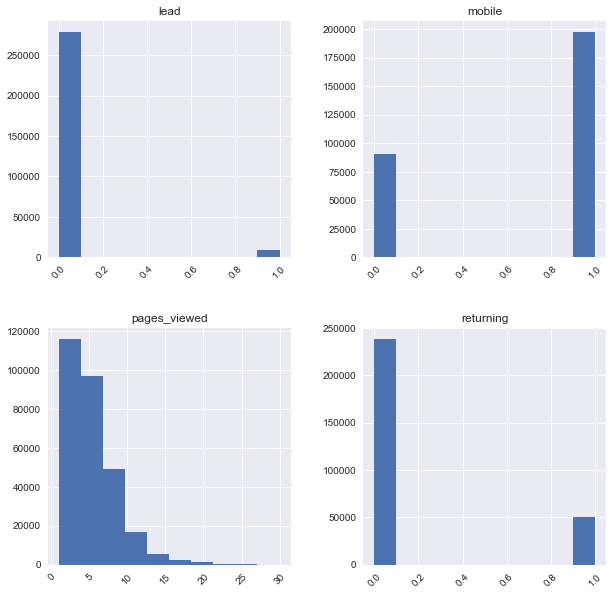

In [12]:
# plot the numberic fields
df.hist(figsize=(10,10), xrot=45)

plt.show()

## Plot Categorical fields

In [13]:
df.describe(include=['object'])

,source,country
count,287742,287742
unique,4,3
top,Facebook,US
freq,162139,141182


In [14]:
df.dtypes == 'object'

source           True
returning       False
mobile          False
country          True
pages_viewed    False
lead            False
dtype: bool

In [15]:
df.dtypes[df.dtypes=='object'].index

Index([u'source', u'country'], dtype='object')

source


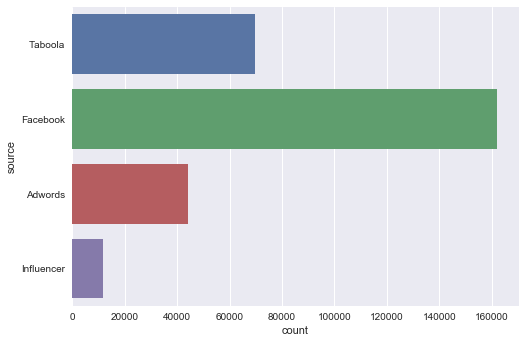

country


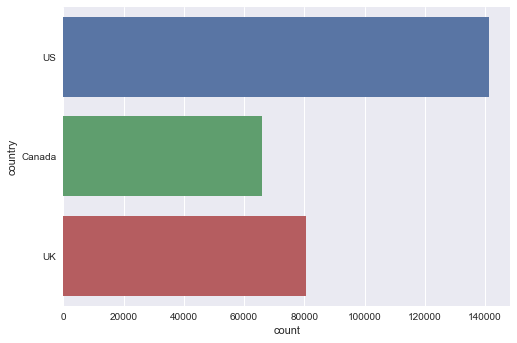

In [16]:
# bar plot each of the categorical fields 
# use seaborn count plot
for feature in df.dtypes[df.dtypes == 'object'].index:
    print(feature)
    sns.countplot(y=feature, data=df)
    plt.show()
    
    

### Summary of learnings so far

   * Nearly 209K obeservations with 6 features
   * Numeric features : 4 Categorical features : 2
   * The target variable 'lead' is a numeric type.
   * No missing data
   * The overall conversion data is 3.2%
   * Most of visitors live at US
   * Most of visitors came from Facebook ads.

## Conversion Rate Analysis

Let's understand the different variables and their impact on the conversion.

### source vs lead

In [17]:
?plt.subplots()
?sns.countplot()

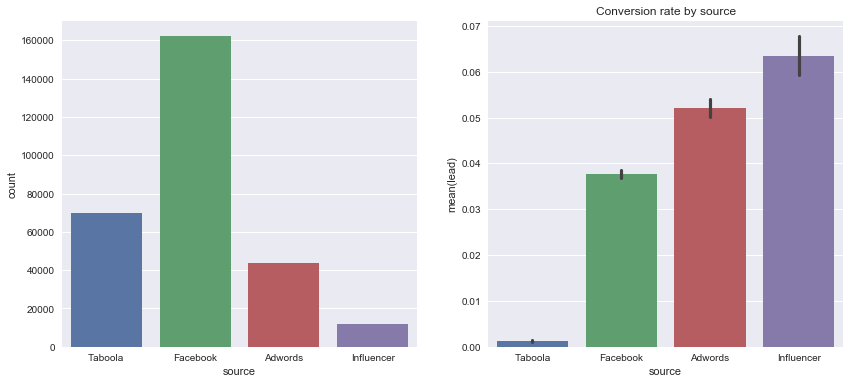

In [18]:
# show the distribution and plot conversion rate
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

#display the distribution on left
sns.countplot(x='source', data=df, ax=ax1)

# plot the converion rate at the right
sns.barplot(x='source', y='lead', data=df, ax=ax2)
plt.title('Conversion rate by source')
plt.show()

### The source 'Taboola' has low conversion rate.

## Let's look at other variables.

In [19]:
def conversion_rate_by(segment_by):
    # show the distribution and plot conversion rate
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

    #display the distribution on left
    sns.countplot(x=segment_by, data=df, ax=ax1)

    # plot the converion rate at the right
    sns.barplot(x=segment_by, y='lead', data=df, ax=ax2)
    plt.title('Conversion rate by {}' .format(segment_by))
    plt.show()

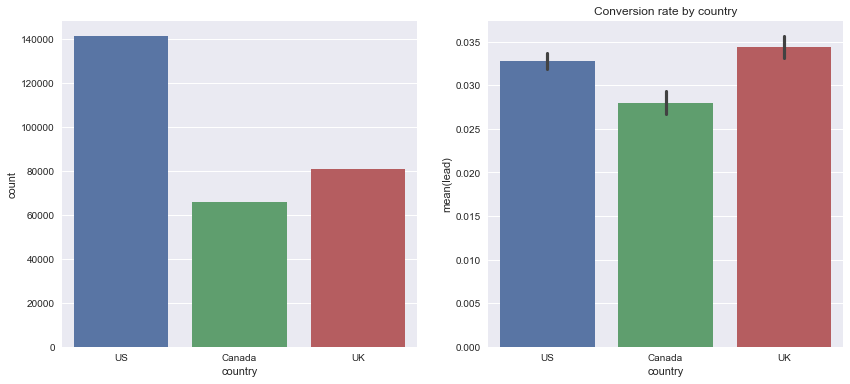

In [20]:
# country vs lead
conversion_rate_by('country')

### Inference: Canada has low conversion rate.

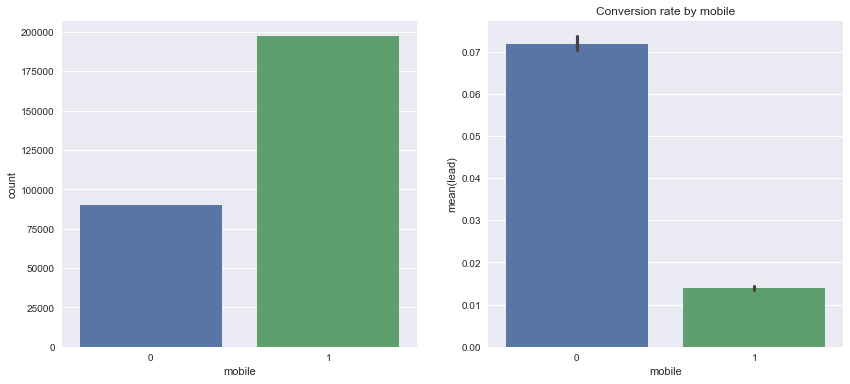

In [21]:
# mobile vs lead
conversion_rate_by('mobile')

### Inference: mobile has low conversion rate.

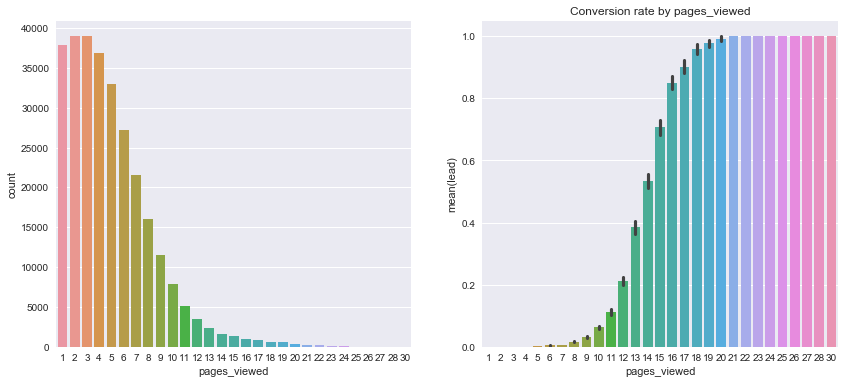

In [22]:
# pages_viewed vs lead

conversion_rate_by('pages_viewed')

### Inference: Conversion is successful when more pages are viewed.

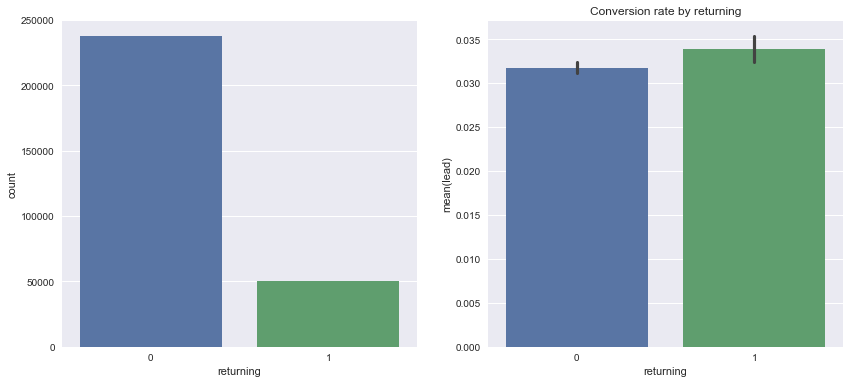

In [23]:
# returning vs lead
conversion_rate_by('returning')

### Inference: The returning and new visitors have almost same conversion rate.

## Correlation info

In [24]:
df.corr()

,returning,mobile,pages_viewed,lead
returning,1.000000,-0.001620,0.002143,0.004551
mobile,-0.001620,1.000000,-0.082047,-0.152557
pages_viewed,0.002143,-0.082047,1.000000,0.520297
lead,0.004551,-0.152557,0.520297,1.000000


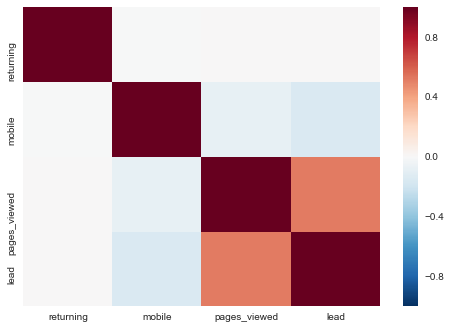

In [25]:
sns.heatmap(df.corr())
plt.show()

## Note:
The categorical variables are not in play while finding out the correlation info. They needed to be converted into some kind of enumeration aka one-hot encoding aka generating dummy variables.

## Build Machine Learning Model

* Split the train and test data
* Fit the training data
* Predict for the test data
* Collect the accuracy metrics

In [26]:
# for splitting train and test data
from sklearn.model_selection import train_test_split

# for classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, partial_dependence

from sklearn.metrics import roc_auc_score

In [28]:
#?pd.get_dummies()

In [29]:
# Create analytical base table : handle the categorical variables with one hot encoding.

abt = pd.get_dummies(df)

In [31]:
abt.head()

,returning,mobile,pages_viewed,lead,source_Adwords,source_Facebook,source_Influencer,source_Taboola,country_Canada,country_UK,country_US
0,1,1,2,0,0,0,0,1,0,0,1
1,0,1,6,0,0,0,0,1,0,0,1
2,0,0,2,0,0,1,0,0,0,0,1
3,0,0,5,0,0,0,0,1,0,0,1
4,0,0,5,0,0,0,0,1,1,0,0


In [32]:
# separate the target variable from features
y = abt.lead
X = abt.drop('lead', axis=1)

In [33]:
## Split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

In [34]:
X_train.head()

,returning,mobile,pages_viewed,source_Adwords,source_Facebook,source_Influencer,source_Taboola,country_Canada,country_UK,country_US
166076,1,1,4,0,1,0,0,0,0,1
145917,1,0,4,0,1,0,0,1,0,0
111739,1,1,6,0,1,0,0,0,0,1
68166,0,1,3,0,1,0,0,0,0,1
88104,0,1,1,0,1,0,0,0,0,1


In [35]:
# Initialize boosted tree
gbm = GradientBoostingClassifier()

# Fit boosted tree
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [36]:
# Get class probability predictions on test set
pred = gbm.predict_proba(X_test)

In [37]:
pred

array([[  9.99814495e-01,   1.85504725e-04],
       [  9.95079866e-01,   4.92013444e-03],
       [  9.99626703e-01,   3.73296937e-04],
       ..., 
       [  9.99566478e-01,   4.33522054e-04],
       [  9.99814495e-01,   1.85504725e-04],
       [  9.98511442e-01,   1.48855825e-03]])

In [38]:
# Only keep the positive class
pred = [p[1] for p in pred]

In [39]:
pred

[0.00018550472480233999,
 0.0049201344401450953,
 0.00037329693745061677,
 0.00039920024119006721,
 0.42715620346221767,
 0.082388609946638089,
 0.012895266100211893,
 0.00042598943515633674,
 0.42715620346221767,
 0.0087434865908607561,
 0.0012722586871023128,
 0.00056069841241351327,
 0.0001692751528525118,
 0.082388609946638089,
 0.00069996558916875554,
 0.00049171626936198932,
 0.00075092178761483749,
 0.00054121806688831877,
 0.0019980453380097018,
 0.0003643104854008724,
 0.025430390520754697,
 0.0003643104854008724,
 0.0033037367766196868,
 0.0004422380954882265,
 0.00045482071004940234,
 0.0010192425589008766,
 0.00035958039384627506,
 0.00054121806688831877,
 0.0004422380954882265,
 0.073640646606685761,
 0.00018550472480233999,
 0.0005069128049425733,
 0.0020672088091206946,
 0.0005069128049425733,
 0.042036508589115264,
 0.075655434511786149,
 0.00043193058925678439,
 0.0019980453380097018,
 0.0019980453380097018,
 0.42715620346221767,
 0.00017573359425443642,
 0.78898731334

In [40]:
# Display AUROC
roc_auc_score(y_test, pred)

0.98165117482894115

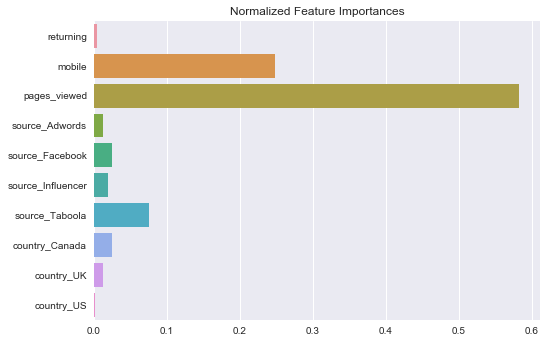

In [41]:
# Plot feature importances
plt.title('Normalized Feature Importances')
sns.barplot(y=X.columns, x=gbm.feature_importances_)
plt.show()

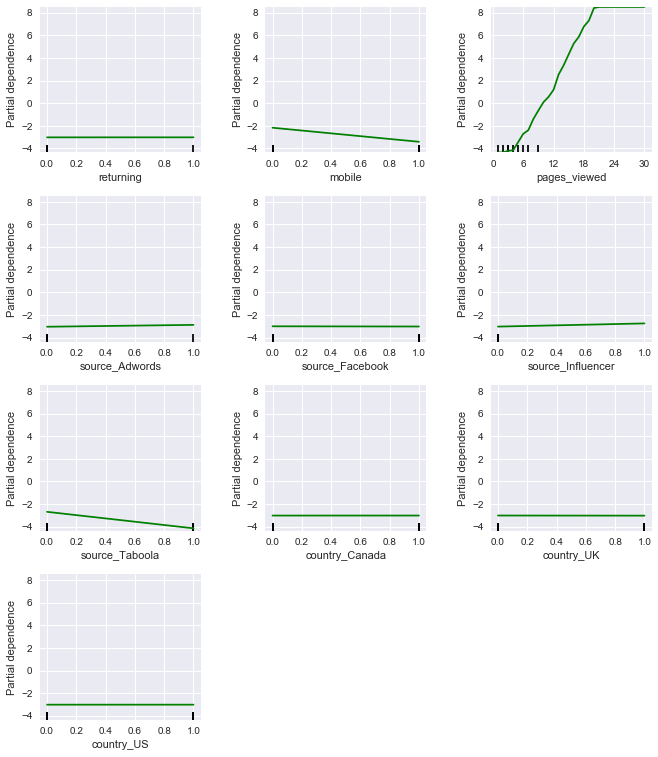

In [42]:
# Partial dependence pltos
partial_dependence.plot_partial_dependence(gbm, 
                                           X=X_train, 
                                           features=range(len(X.columns)), 
                                           feature_names=X.columns,
                                           figsize=(10,18))
plt.show()

## Actionable insights

* Pages a visitor views is correlated with conversion rate.
* Mobile visitors have low conversion rate. That needs to be improved.
* The campaign - Taboola is not working. Need to relook at it